Objective: Predict chances of admission based on student academic and profile factors.

In [46]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/University Admission Prediction.csv")

In [47]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9,Unnamed: 10
0,1,337,118,4,4.5,4.5,9.65,1,0.92,NaN,NaN
1,2,324,107,4,4.0,4.5,8.87,1,0.76,NaN,NaN
2,3,316,104,3,3.0,3.5,8.00,1,0.72,NaN,NaN
3,4,322,110,3,3.5,2.5,8.67,1,0.80,NaN,NaN
4,5,314,103,2,2.0,3.0,8.21,0,0.65,NaN,NaN


2. Understand the dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   Unnamed: 9         0 non-null      float64
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(6), int64(5)
memory usage: 34.5 KB


3. Data Cleaning

In [49]:
df.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [50]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [51]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [52]:
df.columns = df.columns.str.strip()

In [53]:
df.rename(columns={'Chance of Admit': 'Chance_of_Admit'}, inplace=True)

In [54]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')


In [55]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


4. Exploratory Data Analysis

(i) Visualize Distribution of Chance_of_Admit

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

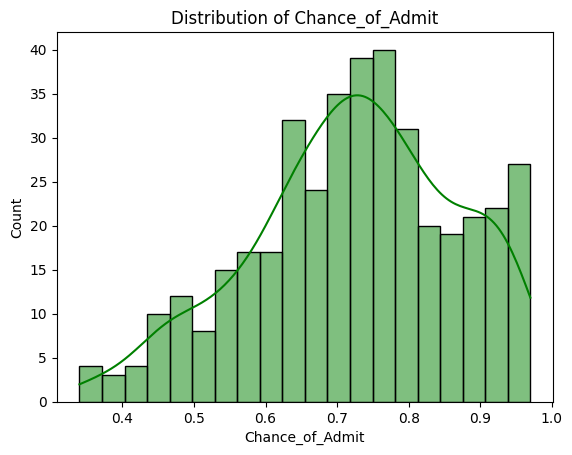

In [57]:
sns.histplot(df['Chance_of_Admit'], kde=True, bins=20, color='green')
plt.title("Distribution of Chance_of_Admit")
plt.show()

Insights: It is slightly right-skewed so many have lower chances. Most students have a chance of admit between 0.65 to 0.80.


To find high correlation of Chance of Admit with features like CGPA, GRE Score, Research using heat map

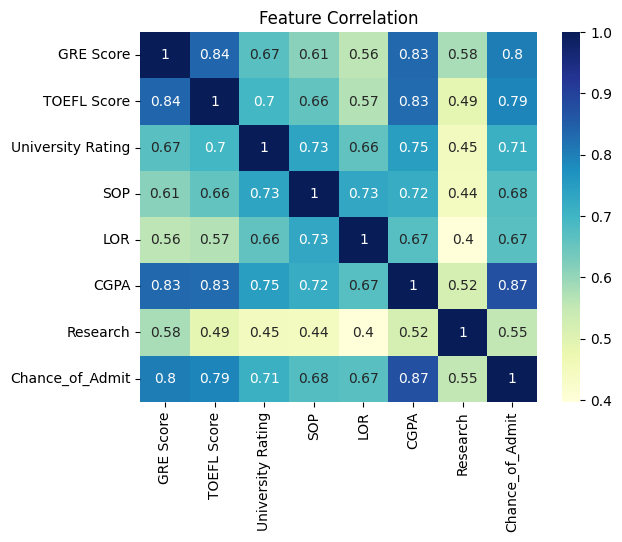

In [58]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation")
plt.show()

5. Finding Outliers

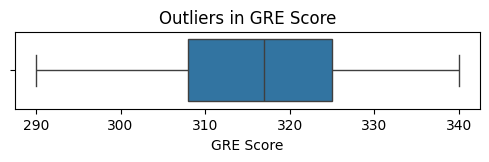

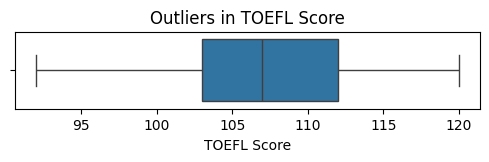

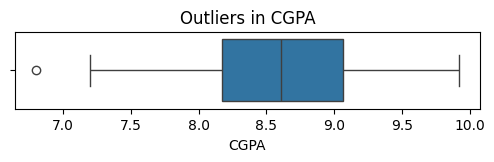

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers in key features
features_to_check = ['GRE Score', 'TOEFL Score', 'CGPA']

for col in features_to_check:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

** 6. Test train Split Data into X and Y

In [60]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
target = 'Chance_of_Admit'

In [61]:
from sklearn.model_selection import train_test_split

# 1. Define feature columns and target column
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
            'LOR', 'CGPA', 'Research']
target   = 'Chance_of_Admit'

# 2. Create X and y
X = df[features]
y = df[target]

# 3. Perform the train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# 4. Verify the split
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test  shape:", y_test.shape)

X_train shape: (320, 7)
X_test  shape: (80, 7)
y_train shape: (320,)
y_test  shape: (80,)


## Train a Linear Regression model

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test data
X_test_scaled  = scaler.transform(X_test)

In [63]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)

In [64]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Insights:

. CGPA Is the Single Strongest Predictor
Correlation with Chance of Admit: ~ 0.87

Coefficient in Linear Model: ~ 0.11

Insight: Every one-point increase in CGPA (on a 10-point scale) boosts your admission chance by ~11 percentage points, all else equal.

Actionable Tip: Aim for a CGPA ≥ 8.6 (dataset median) to stay above average.

2. Standardized Test Scores Matter Too
GRE Score Correlation: ~ 0.80

TOEFL Score Correlation: ~ 0.79

Insight: Each 15-point jump in GRE (about one standard deviation) raises admit chance by ~3–4 p.p.; similarly for 10-point jumps in TOEFL.

Actionable Tip: Target GRE ≥ 317 and TOEFL ≥ 107 (median values) to be competitive.

3. Research Experience Gives a Noticeable Edge
Average Chance of Admit:

With research = ~ 0.76

Without research = ~ 0.69

Insight: Having at least one published/project experience lifts your admit probability by ~7 percentage points on average.

Actionable Tip: If possible, get involved in undergraduate research or a capstone project.

4. University Rating & SOP/LOR Strengths Are “Tiebreakers”
University Rating Correlation: ~ 0.71

SOP & LOR Correlations: ~ 0.67–0.68

Insight: Upgrading from a 3-star to a 5-star university rating adds ~6–7 p.p. to your chance; similarly, strong SOP/LOR (4–5 vs 2–3) adds ~8–10 p.p.

Actionable Tip:

Craft a compelling SOP with clear research goals.

Secure strong recommendation letters from faculty who know you well.

5. Distributional Takeaways
Mean Chance of Admit: 0.724

Skew: Slight right-skew (more high-chance candidates)

Insight: Majority of applicants fall in the 0.64–0.83 admit range (25th–75th percentiles).